# Conjuntos de Julia y Mandelbrot 3D

Los conjuntos de fractales de Julia y de Mandelbrot poseen representaciones tridimensionales que son reflejo de una dimensión adicional  4D. Es como cuando en 3D hacemos un corte en 2D y obtenemos un plano.

A continuación se presenta un ejemplo de algoritmo que permite generar una imagen 3D de estos conjuntos.

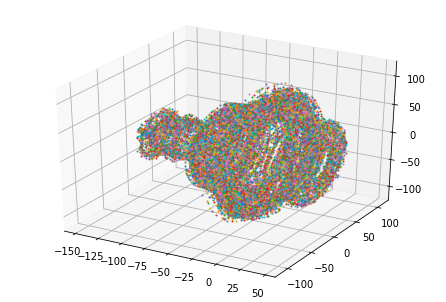

In [18]:
# <!-- collapse=True -->
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib import cm
import numpy as np

fig=plt.figure()
# agregar un tercer eje para la tercera coordenada
ax = Axes3D(fig)

p =[]

#Valor constante para la 4ta dimensión
cw =0.0

# 4 vectores constantes para el conjunto de Julia
cr=-0.2
ci=-0.0
cj=-0.2
ck=0.7

#Números grandes se enfocan en una pequeña sección
zoom = 1

#desplazamiento de los ejes x, y, z respectivamente.
a = 0.0
b = 0.0
c = 0.0

#Número máximo de iteraciones por fractal
maxIter = 20

#número mínimo de iteraciones requeridas para plotear un punto.
pointMin = 14

#Para fractales de Julia toma un valor de 0
#Para fractales de Mandelbrot un valor de 1
mandel = 1

def getIfromRGB(rgb):
    red = rgb[0]
    green = rgb[1]
    blue = rgb[2]
    RGBint = (red<<16) + (green<<8) + blue
    return RGBint

#Recorre cada punto a ser examinado en una caja
#de 200x200x200
for k in range(-200,200,2):
    for j in range(-200,200,2):
        for i in range(-200,200,2):
            #Inicializa los valores iniciales de iteración en el punto
            w = cw
            x =a + i/(100.0 * zoom)
            y =b + j/(100.0 * zoom)
            z =c + k/(100.0 * zoom)

            #Si el conjunto es de Mandelbrot
            if mandel == 1:
                cr = x
                ci = y
                cj = z
                ck = w

            iter = 0

            #distancia de la iteracion desde el origen
            dist = 0

            #usando multiplicación de cuaterniones, aplique la iteración z(n+1) = z*z + c
            #hasta el punto en que escapa de los limites y ha ejecutado las suficientes
            #iteraciones.
            while dist < 4 and iter < maxIter:
                tem = x+x
                x = x*x-y*y-z*z-w*w+cr
                y = tem*y + ci
                z = tem*z + cj
                w = tem*w + ck

                iter += 1
                dist = x*x +y*y + z*z + w*w

            #Si el punto recorrió un número aceptable de iteraciones, dibujelo
            #el color del punto refleja en que iteración estaba antes de salir.
            #the color fo the dot reflects what iteration the point made it to before it escaped
            if iter >= pointMin  and iter <=maxIter-1:
                rgb = [iter*2,iter*3,iter*4]
                iRGB = getIfromRGB(rgb)
                ax.scatter(i,j,k,s=1)
                
